In [1]:
import sys
sys.path.append('../../')
from helpers.window import window_input_output

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.multioutput import MultiOutputRegressor

In [3]:
df = pd.read_csv('../../datasets/Organic.csv')
df.head()

,Date,Envi,Fuji,Gala
0,2015-01-04,3199,6917,8
1,2015-01-11,8856,15071,25
2,2015-01-18,5475,32539,42
3,2015-01-25,4271,8412,585
4,2015-02-01,4824,10710,104


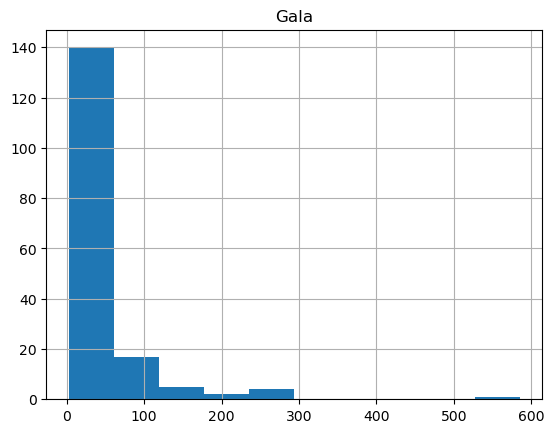

In [4]:
data = df[['Gala']]
data.hist();

In [5]:
seq_df = window_input_output(14, 14, data)
seq_df

,Gala,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,y_4,y_5,y_6,y_7,y_8,y_9,y_10,y_11,y_12,y_13
27,32,11.0,33.0,22.0,50.0,48.0,21.0,19.0,19.0,45.0,...,46.0,15.0,29.0,13.0,10.0,104.0,585.0,42.0,25.0,8.0
28,23,32.0,11.0,33.0,22.0,50.0,48.0,21.0,19.0,19.0,...,28.0,46.0,15.0,29.0,13.0,10.0,104.0,585.0,42.0,25.0
29,22,23.0,32.0,11.0,33.0,22.0,50.0,48.0,21.0,19.0,...,16.0,28.0,46.0,15.0,29.0,13.0,10.0,104.0,585.0,42.0
30,23,22.0,23.0,32.0,11.0,33.0,22.0,50.0,48.0,21.0,...,9.0,16.0,28.0,46.0,15.0,29.0,13.0,10.0,104.0,585.0
31,22,23.0,22.0,23.0,32.0,11.0,33.0,22.0,50.0,48.0,...,20.0,9.0,16.0,28.0,46.0,15.0,29.0,13.0,10.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,25,50.0,35.0,23.0,36.0,33.0,54.0,22.0,13.0,30.0,...,75.0,85.0,31.0,11.0,17.0,21.0,39.0,21.0,22.0,41.0
165,11,25.0,50.0,35.0,23.0,36.0,33.0,54.0,22.0,13.0,...,27.0,75.0,85.0,31.0,11.0,17.0,21.0,39.0,21.0,22.0
166,52,11.0,25.0,50.0,35.0,23.0,36.0,33.0,54.0,22.0,...,36.0,27.0,75.0,85.0,31.0,11.0,17.0,21.0,39.0,21.0
167,33,52.0,11.0,25.0,50.0,35.0,23.0,36.0,33.0,54.0,...,21.0,36.0,27.0,75.0,85.0,31.0,11.0,17.0,21.0,39.0


## Split data

In [6]:
X_cols = [col for col in seq_df.columns if col.startswith('x')]
X_cols.insert(0, 'Gala')
y_cols = [col for col in seq_df.columns if col.startswith('y')]

X = seq_df[X_cols]
y = seq_df[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=123)

In [7]:
model = MultiOutputRegressor(OneVsRestClassifier(SVR(kernel='rbf')))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Score

In [8]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Gala):", mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (Gala):", mae)

print("R-squared (Test score)", model.score(X_test, y_test))
print("Train score", model.score(X_train, y_train))

Mean Squared Error (Gala): 6943.261083743842
Mean Absolute Error (Gala): 56.65517241379312
R-squared (Test score) -1.6984623598746158
Train score 0.9927338418030718


## Visualization

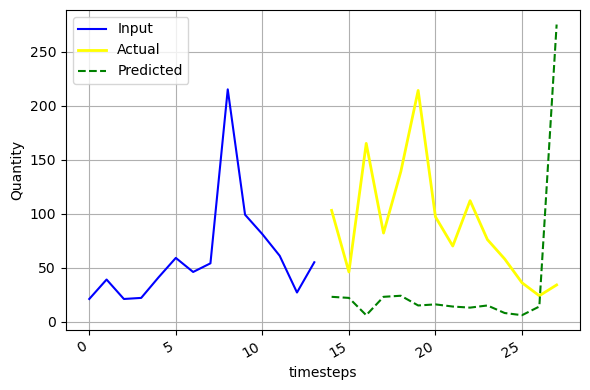

In [9]:
X_test_array = X_test.to_numpy()
y_test_array = y_test.to_numpy()

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(np.arange(0, 14, 1), X_test_array[1], 'b-', label='Input')
ax.plot(np.arange(14, 28, 1), y_test_array[1], color='yellow', label='Actual', linewidth=2)
ax.plot(np.arange(14, 28, 1), y_pred[1], color='green', label='Predicted', linestyle='--')

ax.set_xlabel('timesteps')
ax.set_ylabel('Quantity')
plt.grid(True)
plt.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

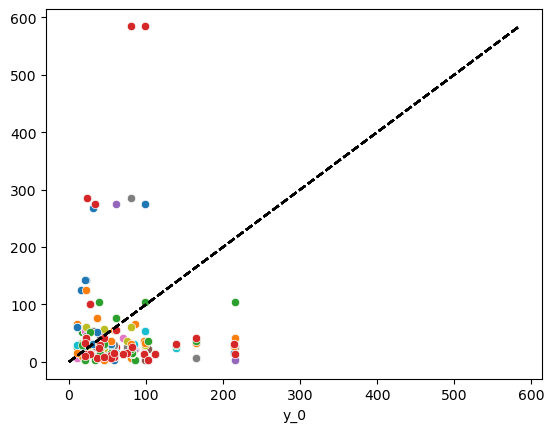

In [10]:
for i, col in enumerate(y_test.columns):
    sns.scatterplot(x=y_test[col], y=y_pred[:, i])

    max_val = max(y_test.max().max(), y_pred.max().max())
    plt.plot([0, max_val], [0, max_val], color='black', linestyle='--')